# 第三章 数据可视化
## 1. plotnine 简介
在 python 中有许多绘图库，除了我们熟悉的 matplotlib 之外，今天给大家介绍一个类似 R 语言 ggplot2 的 python 绘图库 plotnine。如果你之前接触过 R 中的 ggplot，那么使用 plotnine 将毫不费力。
首先，安装并导入 plotnine 包。

In [2]:
from plotnine import *
from plotnine.data import mpg, diamonds #导入用到的数据集

In [3]:
mpg.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


mpg 包含了由美国环境保护协会收集的38种车型的观测数据。

* displ  引擎大小，单位为升
* hwy  汽车在高速公路上行驶时的燃油效率，单位为 英里/加仑（mpg）。与燃油效率高的汽车相比，燃油效率低的汽车在行驶相同距离时要消耗更多燃油
* cty  汽车在城市道路上行驶时的燃油效率
* cyl  气缸数量
* drv  f-前轮驱动，r-后轮驱动，4-4驱
* class  2seater-两座型，subcompact-微型，compact-紧凑型，midsize-中型，suv，minivan-面包车，pickup-皮卡

## 2.基本语法
* ggplot 创建了一个坐标系，可以在它上面添加图层
* aes 数据中的变量到图形成分的映射
* geom 几何对象，负责每个数据点的可视化，geom_ 后面的部分决定几何对象的类型，每个图至少添加一个几何对象，不同的视觉对象由 aes 控制映射
* stat 统计变换，在数据被提取出来之前对数据进行聚合和其他计算，用 stat_ 确定对数据进行的计算类型，不同类型的计算统计产生不同的图形结果
* scale 标度函数，对数据图形的调整，通过scale_ 函数将获取的数据进行调整以改变图形的长度、颜色、大小和形状。

完整公式：

`(
ggplot(df, aes())
+geom_() + scale_() + ……
)`

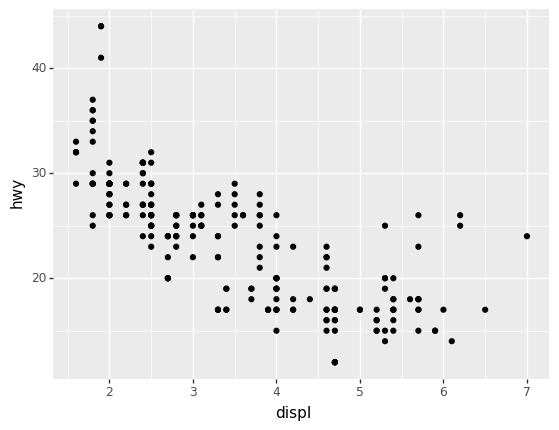

<ggplot: (104675865528)>

In [4]:
(
ggplot(mpg)  
+ geom_point(aes(x = 'displ', y = 'hwy'))
)

上图显示出引擎大小（displ）和燃油效率（hwy）之间是负相关关系。换句话说，大引擎汽车更耗油。
## 3.图形属性映射
上图中有一组点似乎位于线性趋势之外，这些汽车比预期具有更高的里程数，我们可以假设这些汽车是跑车。为了验证这一点，我们可以向二维散点图中添加第三个变量——class，方式是将它映射为图形属性。

图形属性是图中对象的可视化属性，包括数据点的大小、形状和颜色。通过改变图形属性的值，可以用不同的方式来显示数据点。

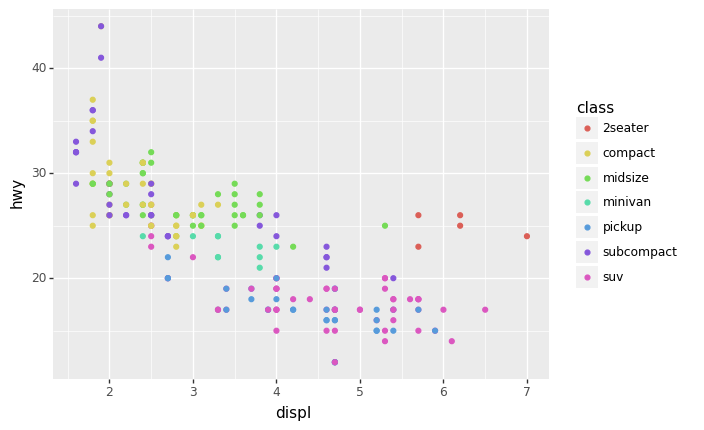

<ggplot: (104675865576)>

In [5]:
(
ggplot(mpg) 
+ geom_point(aes(x = 'displ', y = 'hwy', color = 'class'))
)

E:\anaconda3\lib\site-packages\plotnine\scales\scale_size.py:48: PlotnineWarning: Using alpha for a discrete variable is not advised.


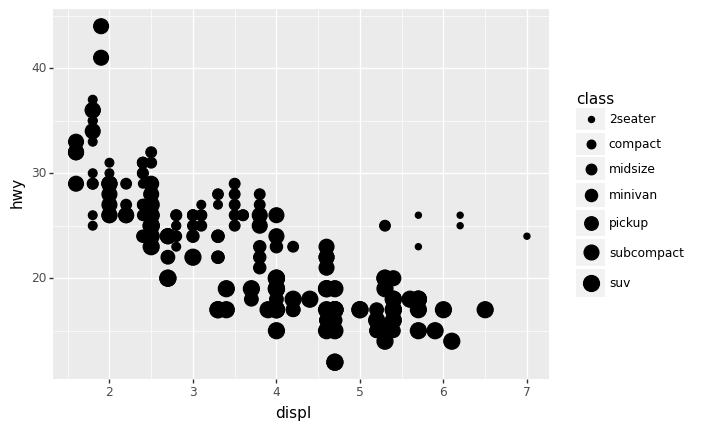

<ggplot: (104676829802)>

In [8]:
(
ggplot(mpg) 
+ geom_point(aes(x = 'displ', y = 'hwy', size = 'class'))
)

E:\anaconda3\lib\site-packages\plotnine\scales\scale_alpha.py:68: PlotnineWarning: Using alpha for a discrete variable is not advised.


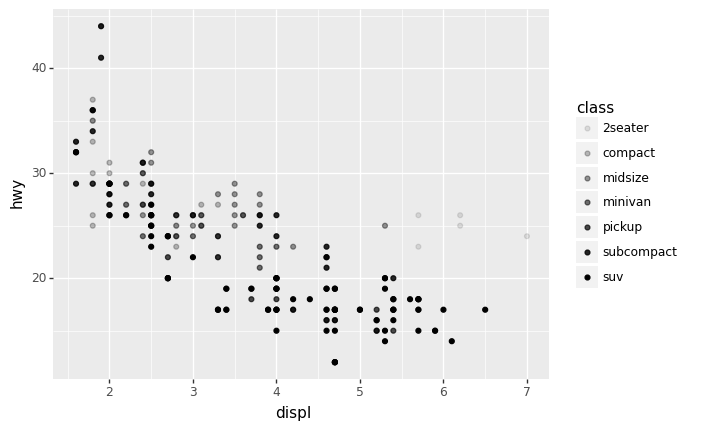

<ggplot: (104676588927)>

In [9]:
(
ggplot(mpg) 
+ geom_point(aes(x = 'displ', y = 'hwy', alpha = 'class'))
)

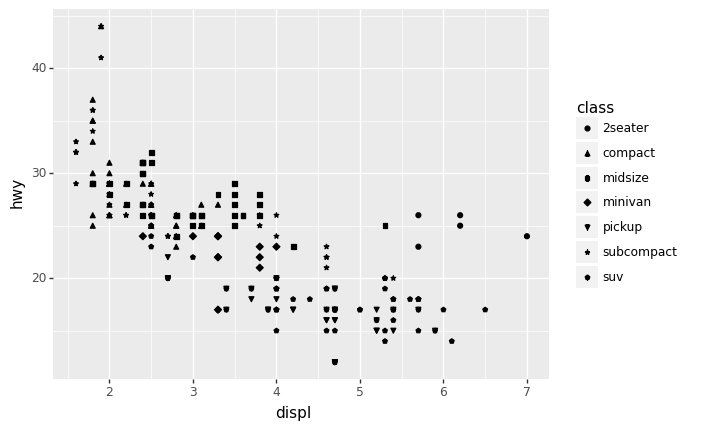

<ggplot: (104676729829)>

In [10]:
(
ggplot(mpg) 
+ geom_point(aes(x = 'displ', y = 'hwy', shape = 'class'))
)

还可以手动为几何对象设置图形属性。

例如，我们可以让图中的所有点都为蓝色：

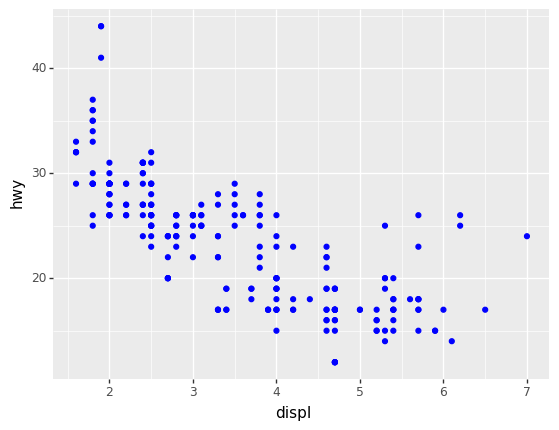

<ggplot: (104669475413)>

In [11]:
(
ggplot(mpg) 
+ geom_point(aes(x = 'displ', y = 'hwy'), color = 'blue')
)

此时颜色不会传达关于变量的信息，只是改变图的外观。要想手动设置图形属性，需要按名称进行设置，将其作为几何对象函数的一个参数。这也就是说，需要在函数aes()的外部进行设置。

## 4.分面
添加额外变量的一种方法是使用图形属性。另一种方法是将图分割成多个分面，即可以显示数据子集的子图。这种方法特别适合添加分类变量。

要想通过单个变量对图进行分面，可以使用函数`facet_wrap()`。

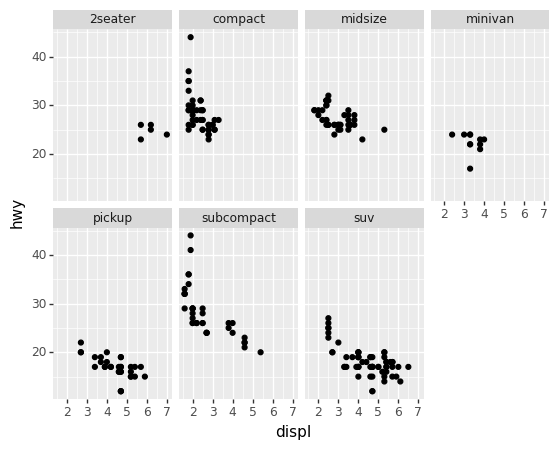

<ggplot: (104676980721)>

In [12]:
(
ggplot(mpg)  
+ geom_point(aes(x = 'displ', y = 'hwy'))  
+ facet_wrap('class', nrow = 2)
)

要想通过两个变量对图进行分面，需要在绘图命令中加入函数 `facet_grid()`。

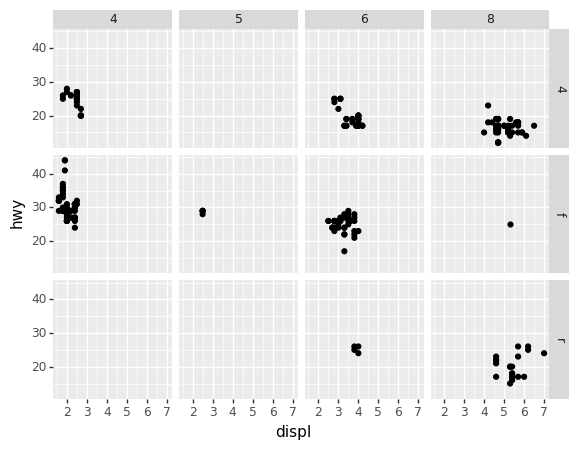

<ggplot: (104676743494)>

In [13]:
(
ggplot(mpg)  
+ geom_point(aes(x = 'displ', y = 'hwy'))  
+ facet_grid(('drv','cyl'))
)

## 5.几何对象
几何对象是图中用来表示数据的几何图形对象。例如，条形图使用了条形几何对象，折线图使用了直线几何对象，箱线图使用了矩形和直线几何对象。散点图则使用点几何对象。我们可以使用不同的几何对象来表示同样的数据。

要想改变图中的几何对象，需要修改/添加在`ggplot()`函数中的几何对象函数。例如，我们可以在最开始的散点图上，添加一条平滑的曲线来拟合数据。

E:\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


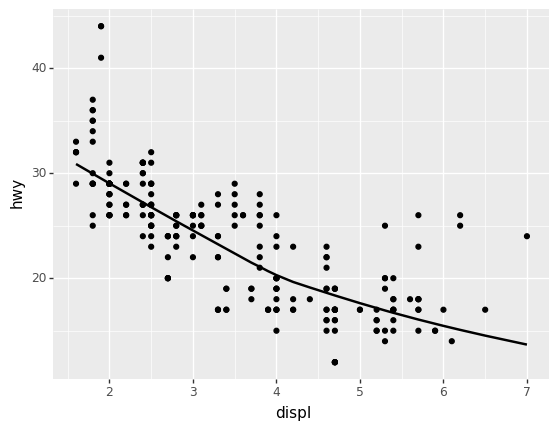

<ggplot: (104676881999)>

In [36]:
(
ggplot(mpg)  
+ geom_point(aes(x = 'displ', y = 'hwy'))
+ geom_smooth(aes(x = 'displ', y = 'hwy'))
)

但是，这样代码就产生了一些重复。假如你想将 y 轴上的变量从 hwy 改成 cty，那么就要在两个地方修改这个变量，但你或许会漏掉一处。避免这种重复的方法是将一组映射传递给`ggplot()`函数,这些映射会作为全局映射应用到图中的每个几何对象中。换句话说，以下代码将绘制出与上面代码同样的图：

E:\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


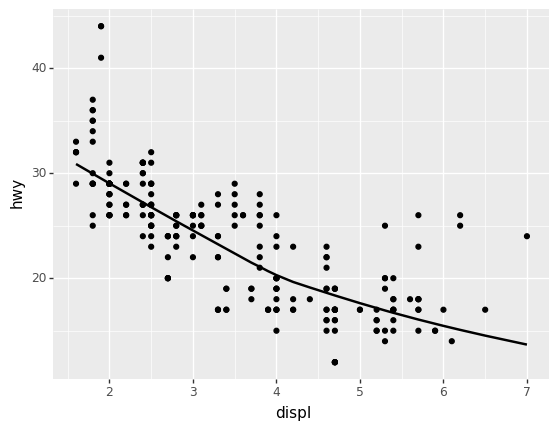

<ggplot: (104676878710)>

In [37]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy'))
+ geom_point()
+ geom_smooth()
)

不同几何对象都能将某一变量映射为不同的图形属性，`geom_smooth()`函数可以按照不同的线型绘制出不同的曲线，每条曲线对应映射到线型的变量的一个唯一值.

E:\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


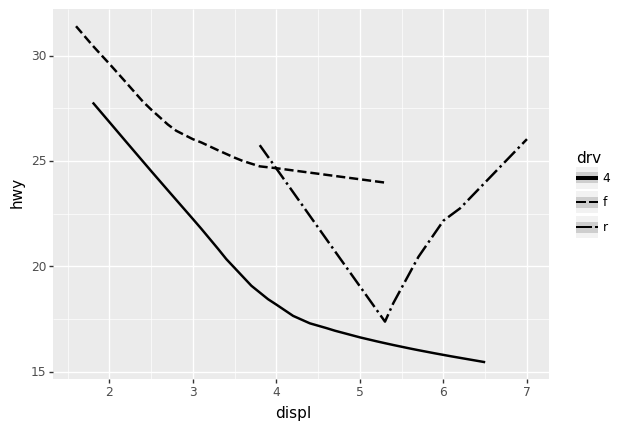

<ggplot: (104676884740)>

In [38]:
(
ggplot(mpg)  
+ geom_smooth(aes(x = 'displ', y = 'hwy', linetype = 'drv'))
)

这里的`geom_smooth()`函数分别用 3 条曲线来表示汽车。一条线表示四轮驱动的所有汽车，一条线表示前轮驱动的所有汽车，另一条线表示后轮驱动的所有汽车。

我们可以将这些曲线覆盖在原始数据上，并按照 drv 值对所有的点和线进行着色，这样能看得更清楚一些。

E:\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


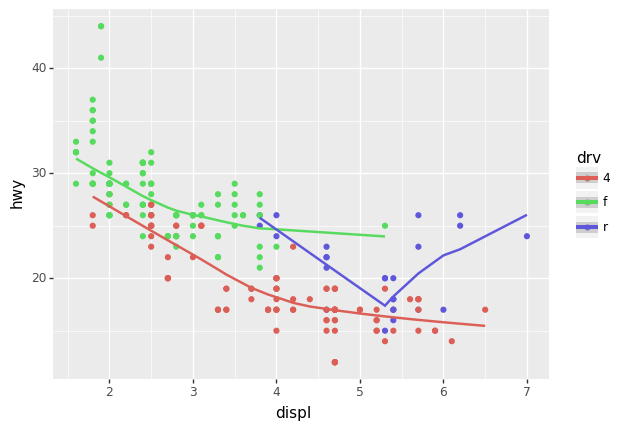

<ggplot: (104680559659)>

In [39]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy', color = 'drv'))  
+ geom_point()
+ geom_smooth()
)

刚才提到，如果将一组映射传递给`ggplot()`函数，这些映射会作为全局映射应用到图中的每个几何对象中。如果将映射放在几何对象函数中，那么这个映射只是该图层的局部映射，它将扩展或覆盖全局映射，但仅对该图层有效。这样一来，我们就可以在不同的图层中显示不同的图形属性：

E:\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


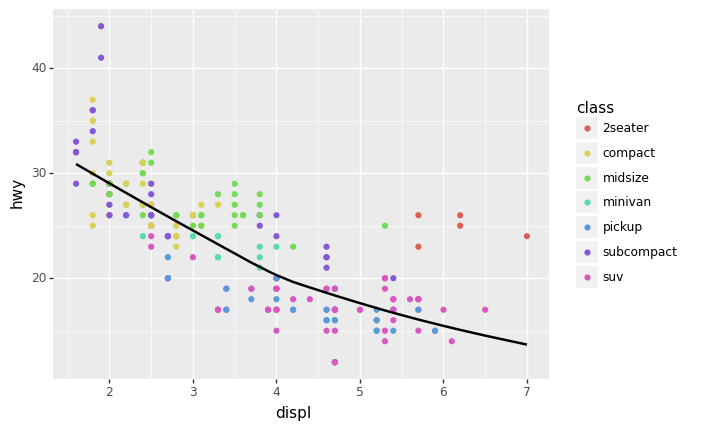

<ggplot: (104677056488)>

In [40]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy')) 
+ geom_point(aes(color = 'class')) 
+ geom_smooth()
)

同理，我们也可以为不同的图层指定不同的数据。

下图中的平滑曲线表示的只是 mpg 数据集的一个子集，即微型车。`geom_smooth()`函数中的局部数据参数覆盖了`ggplot()`函数中的全局数据参数，当然仅对这个图层有效：

E:\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


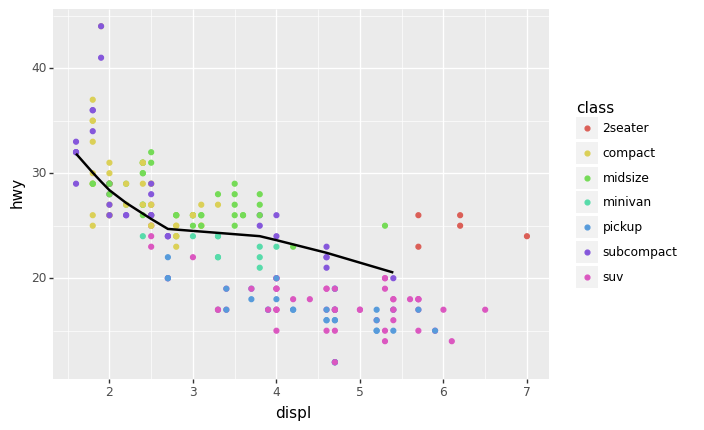

<ggplot: (104676944698)>

In [21]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy'))  
+ geom_point(aes(color = 'class'))
+ geom_smooth(mpg[mpg['class']=='subcompact'])
)

## 6.统计变换
我们首先看看用到的另一个数据集——diamonds，diamonds 包含大约 54,000 颗钻石的信息，每颗钻石具有 price、carat、color、clarity 和 cut 变量。
* cut 切割质量 (Fair, Good, Very Good, Premium, Ideal)
* clarity 纯度 (I1(worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF(best))

In [22]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


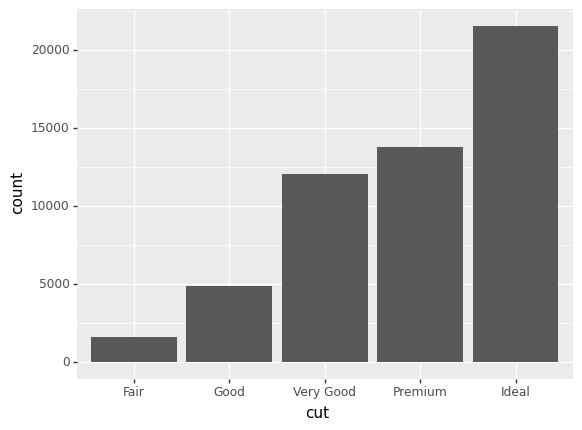

<ggplot: (104676066988)>

In [23]:
(
ggplot(diamonds)
+ geom_bar(aes(x = 'cut'))
)

上图 X 轴是我们指定的变量 cut，Y 轴 count 则是根据原始数据计算出的新数据。绘图时用来计算新数据的算法称为 stat（statistical transformation，统计变换）。通过查看 stat 参数的默认值，可以知道几何对象函数使用了哪种统计变换。例如，`geom_bar()`函数 stat 的默认值是 count，这说明`geom_bar()`使用`stat_count()`函数进行统计变换。

通常来说，几何对象函数和统计变换函数可以互换使用。例如，我们可以使用`stat_count()`替换`geom_bar()`来重新生成上图：

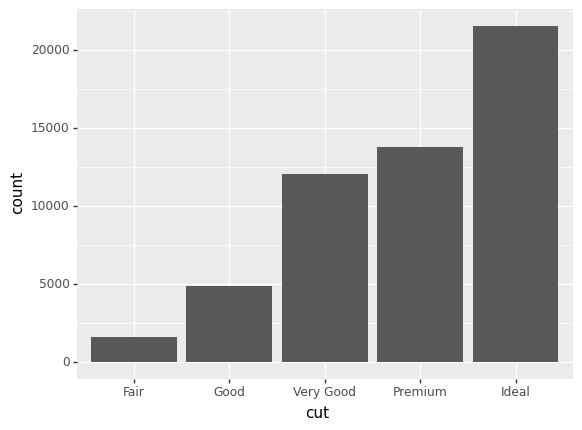

<ggplot: (104677164213)>

In [24]:
(
ggplot(diamonds)
+ stat_count(aes(x = 'cut'))
)

如果想要在代码中强调统计变换，我们可以使用`stat_summary()`函数将人们的注意力吸引到计算出的那些摘要统计量上。`stat_summary()`函数为 x 的每个唯一值计算 y 值的摘要统计：

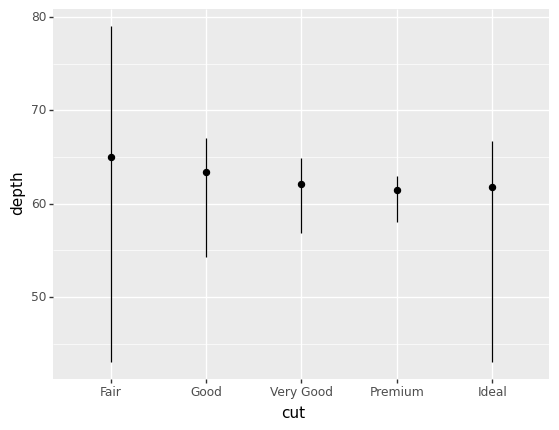

<ggplot: (104676842951)>

In [25]:
import numpy as np
(ggplot(diamonds)  
+ stat_summary(
    mapping = aes(x = 'cut', y = 'depth'),
    fun_ymin = np.min,
    fun_ymax = np.max,
    fun_y = np.median
  ))

## 7.位置调整
条形图还有一项神奇的功能，我们可以使用 color 或者 fill（这个更有用）图形属性来为条形图上色：

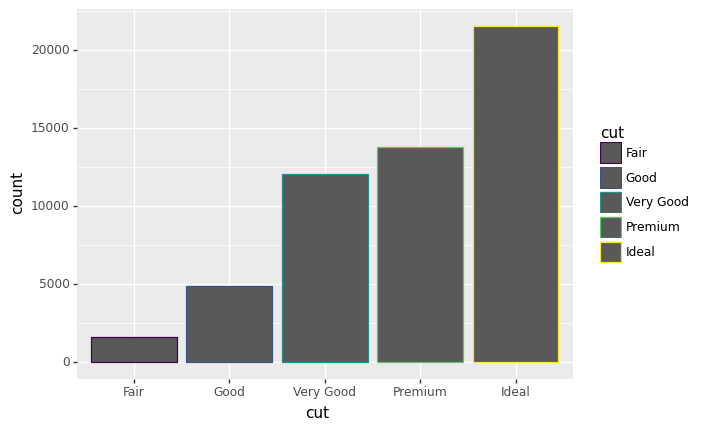

<ggplot: (104676067039)>

In [27]:
(
ggplot(diamonds)
+ geom_bar(aes(x = 'cut', color = 'cut'))
)

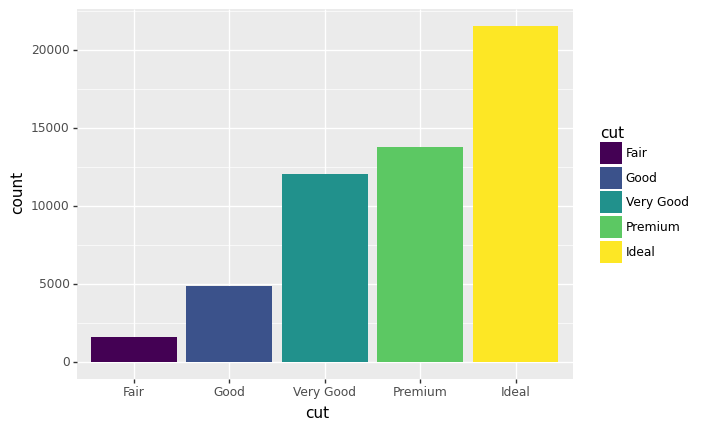

<ggplot: (104676075466)>

In [26]:
(
ggplot(diamonds)
+ geom_bar(aes(x = 'cut', fill = 'cut'))
)

如果将 fill 图形属性映射到另一个变量（如 clarity），那么条形会自动分块堆叠起来。每个彩色矩形表示 cut 和 clarity 的一种组合。

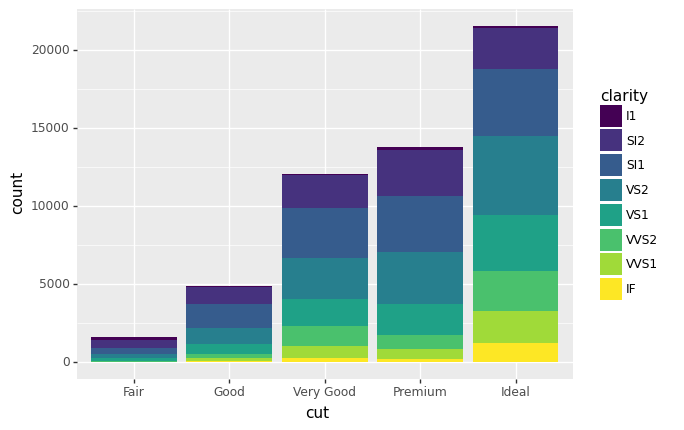

<ggplot: (104675908325)>

In [28]:
(
ggplot(diamonds)
+ geom_bar(aes(x = 'cut', fill = 'clarity'))
)

这种堆叠是由 position 参数设定的位置调整功能自动完成的。如果不想生成堆叠式条形图，还可以使用以下 3 种选项之一："identity"、"fill" 和 "dodge"。
* position = "identity" 将每个对象直接显示在图中。这种方式不太适合条形图，因为条形会彼此重叠。为了让重叠部分能够显示出来，我们可以设置 alpha 参数为一个较小的数，从而使得条形略微透明：

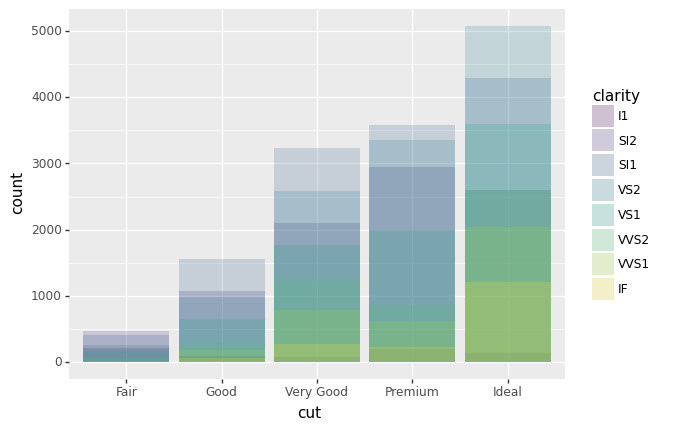

<ggplot: (104677682884)>

In [29]:
(
ggplot(diamonds, aes(x = 'cut', fill = 'clarity'))
+ geom_bar(alpha = 1/5, position = 'identity')
)

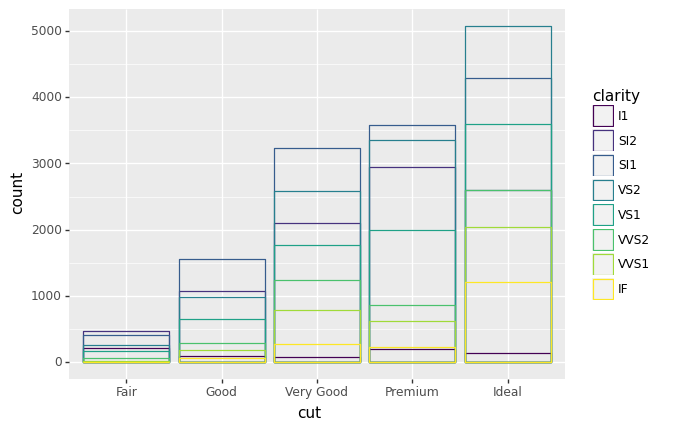

<ggplot: (104677320114)>

In [30]:
(
ggplot(diamonds, aes(x = 'cut', color = 'clarity'))
+ geom_bar(alpha = 0, position = 'identity')
)

* position = "fill" 的效果与堆叠相似，但每组堆叠条形具有同样的高度，因此这种条形图可以非常轻松地比较各组间的比例：

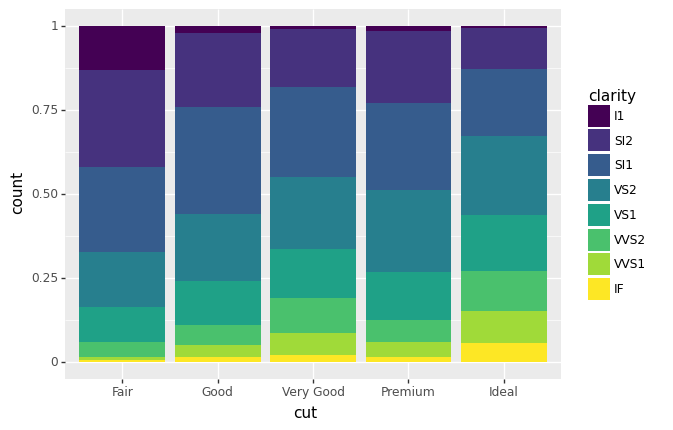

<ggplot: (104680468411)>

In [31]:
(
ggplot(diamonds, aes(x = 'cut', fill = 'clarity'))
+ geom_bar(position = 'fill')
)

*  position = "dodge" 将每组中的条形依次并列放置，这样可以非常轻松地比较每个条形表示的具体数值：

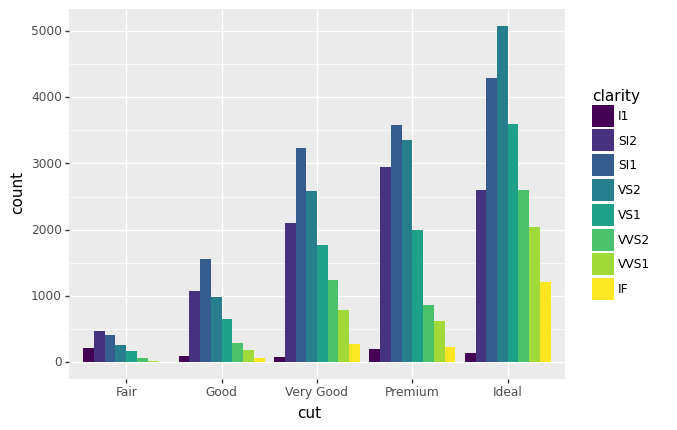

<ggplot: (104680256163)>

In [32]:
(
ggplot(diamonds, aes(x = 'cut', fill = 'clarity'))
+ geom_bar(position = 'dodge')
)

此外还有一种位置调整，虽然不适合条形图，但非常适合散点图。回忆一下我们的第一张散点图，是否发现，虽然数据集中有 234 个观测值，但散点图中只显示了 126 个点？因为 hwy 和 displ 的值都进行了舍入取整，所以这些点显示在一个网格上时，很多点彼此重叠了，这个问题称为过绘制。通过将位置调整方式设为“抖动”，可以避免这种网格化排列。
* position = "jitter" 为每个数据点添加一个很小的随机扰动，这样就可以将重叠的点分散开来，因为不可能有两个点会收到同样的随机扰动：

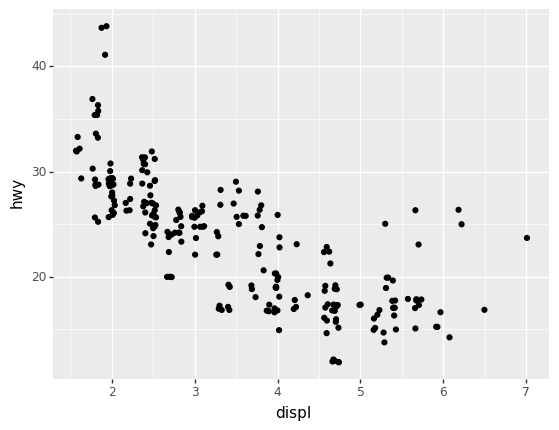

<ggplot: (104680276947)>

In [33]:
(
ggplot(mpg) 
+ geom_point(aes(x = 'displ', y = 'hwy'), position = 'jitter')
)

## 8.坐标系
* `coord_flip()`函数可以交换 x 轴和 y 轴。当想要绘制水平箱线图时，这非常有用，它也非常适合使用长标签

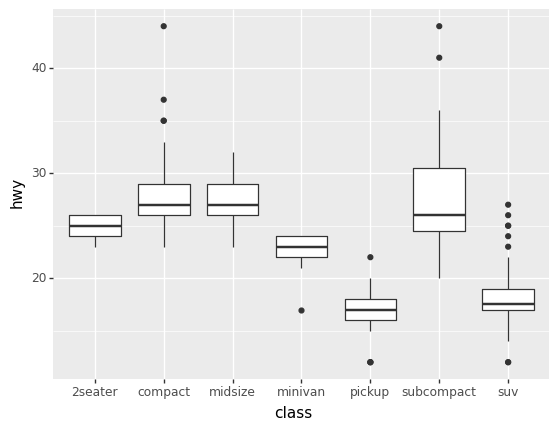

<ggplot: (104680558162)>

In [34]:
(
ggplot(mpg, aes(x = 'class', y = 'hwy'))  
+ geom_boxplot()
)

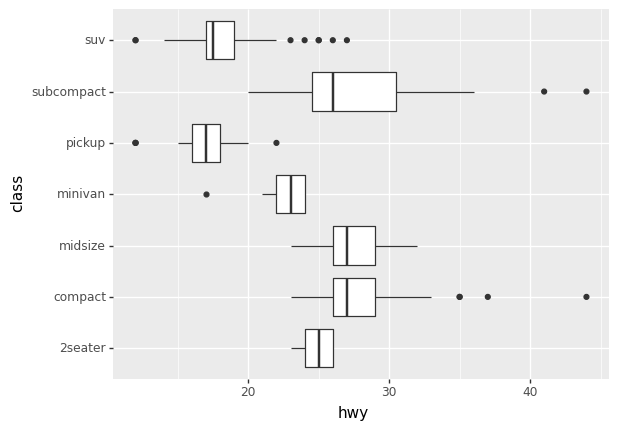

<ggplot: (104677711002)>

In [35]:
(
ggplot(mpg, aes(x = 'class', y = 'hwy'))  
+ geom_boxplot() 
+ coord_flip()
)